# Basic Keras Dense Network

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam

import tensorflow as tf
import numpy as np

In [13]:
print(keras.__version__)
print(tf.__version__)

2.0.5
1.2.1


### Lets import our dataset

In [14]:
def load_mnist(path, kind='train'):
    import os
    import struct
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        struct.unpack(">IIII", imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

In [15]:
path = './data/fashion/'

x_train, y_train = load_mnist(path, kind='train')
x_test, y_test = load_mnist(path, kind='t10k')

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [17]:
#examine what the first image looks like
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
         0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
       214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 217, 22

In [18]:
y_train[0]

2

# What is a Tensor


<img src="./diagram5g.png" style="width:800px;">

multi dimensional array/matrix

### MNIST Image Tensor X_train

<img src="./diagram4f.png" style="width:550px;">
<img src="./diagram6d.png" style="width:550px;">

## Preparing the data for a basic network

In [19]:

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [20]:
n_classes = 10
# convert class vectors to binary One Hot Encoded
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
y_train[0]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

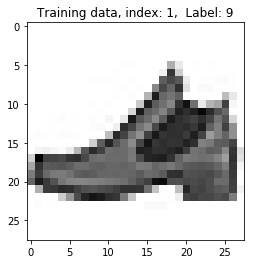

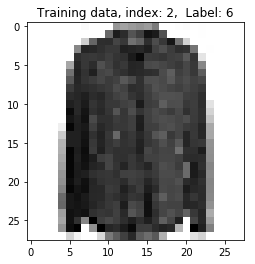

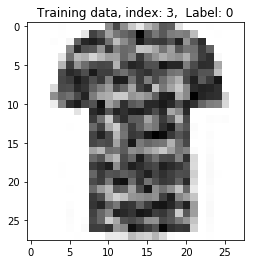

In [22]:
# Method for displaying the number as a picture

def show_digit(index):
    label = y_train[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = x_train[index].reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
def show_predicted_digit(image, pred, label):
    # Reshape 784 array into 28x28 image
    image = image.reshape([28,28])
    plt.title('Original Image, Pred: %d,  True Label: %d' %(pred, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
show_digit(1)
show_digit(2)
show_digit(3)

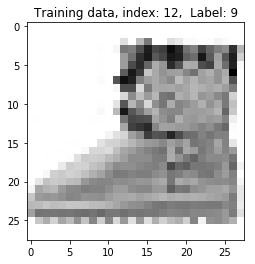

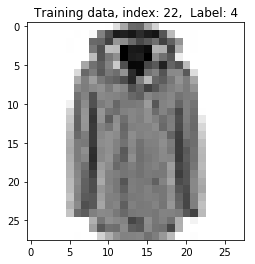

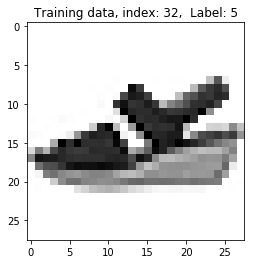

In [23]:
# Display the first (index 0) training image
show_digit(12)
show_digit(22)
show_digit(32)

### Setting up our Network Hyper Parameters

In [24]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 2
batch_size = 100

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

### Lets build our first sequential network

We start out by defining our model as a sequential one  

Then we add 2 Dense layers  
In each Dense layer we have to define the number of hidden units/neurons for that layer  
We can also add a name to each layer so that we can see it easily in our summary and later in Tensorboard


In [25]:
model = Sequential()
model.add(Dense(n_hidden_1,  input_shape=(n_input,), name = "Dense_1"))
model.add(Activation('relu', name = "Relu1"))
model.add(Dense(n_hidden_2, name = "Dense_2"))
model.add(Activation('relu', name = "Relu2"))
model.add(Dense(n_classes, name = "Output"))
model.add(Activation('softmax', name = "Softmax_output"))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
Relu1 (Activation)           (None, 384)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
Relu2 (Activation)           (None, 100)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
_________________________________________________________________
Softmax_output (Activation)  (None, 10)                0         
Total params: 340,950
Trainable params: 340,950
Non-trainable params: 0
_________________________________________________________________


### Lets calculate the the parameters

layer 1 = (384 units * 784 weights) + (384 units * 1 bias)  = 301,440  

layer 2 = (100 units * 384 weights) + (100 units * 1 bias)  = 38,500  

layer 3 = (10 units * 100) +(10 units * bias)



In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s - loss: 0.9463 - acc: 0.7074 - val_loss: 0.6532 - val_acc: 0.7902
Epoch 2/2
60000/60000 [==============================] - 2s - loss: 0.5889 - acc: 0.8065 - val_loss: 0.5424 - val_acc: 0.8205


### Making the model simpler in a simpler way

Often when we write out Layer we put the activation functions in the Layer itself rather than on its own

In [29]:
model = Sequential()
model.add(Dense(n_hidden_1, activation='relu',  input_shape=(n_input,), name = "Dense_1"))
model.add(Dense(n_hidden_2, activation='relu', name = "Dense_2"))
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s - loss: 0.4126 - acc: 0.8561 - val_loss: 0.4174 - val_acc: 0.8577
Epoch 2/2
60000/60000 [==============================] - 2s - loss: 0.4062 - acc: 0.8577 - val_loss: 0.4173 - val_acc: 0.8554


In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.417263046837
Test accuracy: 0.8554


## Now your turn

I want you to build a Sequential model 

In [22]:
# Network Parameters
n_input =  784# MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 100 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 100 # 2nd layer number of neurons
n_hidden_4 = 100 # 2nd layer number of neurons
n_classes =  10# MNIST classes for prediction(digits 0-9 )

In [ ]:
# Build your model here







In [ ]:
#execute this cell to get the solution
%load ./solutions/sol1a.py

In [63]:
#now compile your model


In [ ]:
#test to see that it worked
model.summary()

In [68]:
learning_rate = 0.1 
training_epochs = 2
batch_size = 100

In [69]:
# now train/fit your model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])